In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.metrics import mean_squared_error, accuracy_score, explained_variance_score, mean_absolute_error, mean_absolute_percentage_error

from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import ElasticNetCV, LogisticRegression, LinearRegression, TweedieRegressor, GammaRegressor, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from scipy.stats import randint

In [2]:
data = pd.read_csv("assets/data/main_dataset.csv")
data.shape

(60, 13)

In [4]:
data.head()

,movie,box,pop_rating,pop_trailer,pop_review,budget,critic_rt,critic_ms,public_rt,public_imdb,opinion_pos,opinion_neg,year
0,Call Me by Your Name,41,239,20297,1.100,4.52,94,93,86,7.9,198,10.0,2017
1,Darkest Hour,150,187,9019,0.670,30.00,84,75,82,7.4,94,2.7,2017
2,Dunkirk,527,600,45932,2.500,100.00,92,94,81,7.8,317,10.0,2017
3,Get Out,255,534,20403,1.700,4.50,98,85,86,7.7,107,8.4,2017
4,Lady Bird,79,263,19288,0.849,10.00,99,94,79,7.4,140,3.4,2017


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie        60 non-null     object 
 1   box          60 non-null     int64  
 2   pop_rating   60 non-null     int64  
 3   pop_trailer  60 non-null     int64  
 4   pop_review   60 non-null     float64
 5   budget       60 non-null     float64
 6   critic_rt    60 non-null     int64  
 7   critic_ms    60 non-null     int64  
 8   public_rt    60 non-null     int64  
 9   public_imdb  60 non-null     float64
 10  opinion_pos  60 non-null     int64  
 11  opinion_neg  60 non-null     float64
 12  year         60 non-null     int64  
 13  ratio        60 non-null     float64
 14  roi          60 non-null     float64
 15  ratio_w      60 non-null     float64
 16  imdb_w       60 non-null     float64
 17  rt_w         60 non-null     float64
dtypes: float64(9), int64(8), object(1)
memory usage: 8.6

array([[<AxesSubplot:title={'center':'ratio'}>]], dtype=object)

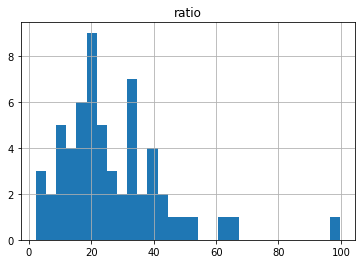

In [3]:
df = data
df["ratio"] = (df["opinion_pos"] / df["opinion_neg"])

df.hist(column="ratio", bins=30)

array([[<AxesSubplot:title={'center':'box'}>]], dtype=object)

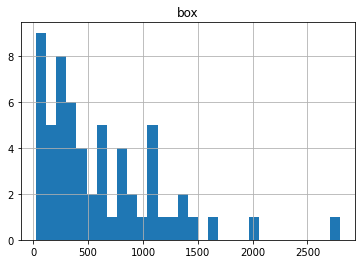

In [4]:
df.hist(column="box", bins=30)

In [5]:
# df["box_l"] = df["box"].apply(convert_box)
df["roi"] = (df["box"] / df["budget"])


array([[<AxesSubplot:title={'center':'roi'}>]], dtype=object)

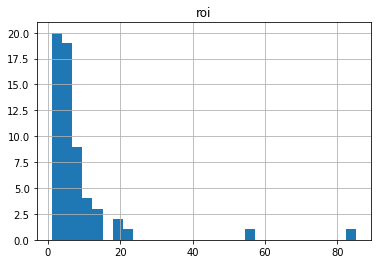

In [448]:
df.hist(column="roi", bins=30)

In [662]:
df.columns

Index(['movie', 'box', 'pop_rating', 'pop_trailer', 'pop_review', 'budget',
       'critic_rt', 'critic_ms', 'public_rt', 'public_imdb', 'opinion_pos',
       'opinion_neg', 'year', 'ratio', 'roi'],
      dtype='object')

In [78]:
cols = ['pop_rating', 'pop_trailer', 'pop_review', 'budget',
        'critic_rt', 'critic_ms', 'public_rt', 'public_imdb',
        'ratio']

X = df[cols]
y = df.iloc[:, 1]

# df['ratio_w'] = df['ratio'] * df['pop_trailer']
# df['public_w'] = df['public_imdb'] * df['pop_rating']

In [79]:
X = pd.DataFrame(MinMaxScaler().fit_transform(X))
X.columns = cols

X['trend'] = (X['pop_trailer'] + X['pop_rating'] + X['pop_review'])/3
X['sentiment'] = X['ratio'] * X['pop_trailer']
X['public'] = (X['public_imdb'] + X['public_rt'])/2 * X['trend']
X['critic'] = (X['critic_ms'] + X['critic_rt'])/2
X['prospect'] = X['budget']

select = [
    'trend', 'sentiment', 'public', 'critic', 'prospect'
]

X = X[select]

# select = [
#     'pop_trailer', 'budget', 'ratio_w', 'public_w'
# ]

# X = df[select]

# X.corr()
f_regression(X, y)
# chi2(X, y)

(array([76.88283286, 65.43177827, 44.61918649,  1.2423821 , 81.61660608]),
 array([3.20465782e-12, 4.34510323e-11, 1.00932043e-08, 2.69609907e-01,
        1.16456916e-12]))

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=3)
y_test.head()

47    583
18    321
56    246
13     75
37    490
Name: box, dtype: int64

In [95]:
param = {
    'n_estimators': randint(1, 10),
    'max_depth': randint(5, 10)
}

search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=0),
    n_iter=10,
    param_distributions=param,
    random_state=0
)

search.fit(X_train.values, y_train.values)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA017AFC10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA02951D00>},
                   random_state=0)

In [93]:
# estimator = ElasticNet(max_iter=10000)
# param = [{
#     # 'alpha': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99],
#     # 'l1_ratio': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
#     'alpha': np.linspace(0, 1, 20),
#     'l1_ratio': np.linspace(0, 1, 20),
# }]

# estimator = SVR(kernel='rbf')
# param = [{
#     'gamma': np.logspace(-2, 10, 20),
#     'C': np.logspace(-9, 3, 20)
# }]

# estimator = KNeighborsRegressor()
# param = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}]

estimator = TweedieRegressor(max_iter=10000)
param = [{
    'power': [0, 1, 1.1, 1.3, 1.5, 1.7, 1.9, 2, 2.5, 3], 
}]

gscv = GridSearchCV(
    estimator = estimator,
    param_grid = param,
    cv = 3,
    scoring = 'neg_root_mean_squared_error'
)

gscv.fit(X_train.values, y_train.values)

gscv.best_params_

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_glm\glm.py", line 310, in fit
    opt_res = scipy.optimize.minimize(
  File "C:\Python39\lib\site-packages\scipy\optimize\_minimize.py", line 623, in minimize
    return _minimize_lbfgsb(fun, x0, args, jac, bounds,
  File "C:\Python39\lib\site-packages\scipy\optimize\lbfgsb.py"

{'power': 1.5}

In [ ]:
pipe = make_pipeline(
    # StandardScaler(),
    # MinMaxScaler(),
    # MultinomialNB()
    # GaussianNB()
    # ComplementNB()
    # DecisionTreeClassifier()
    # NearestCentroid()
    # KNeighborsRegressor()
    # LinearRegression()
    # MLPRegressor(random_state=11, max_iter=10000)
    # ElasticNetCV()
    # SVC()
    # TweedieRegressor(power=0, link='identity')
    # GammaRegressor(alpha=5.5)
    # SVR(kernel='rbf')
    # LogisticRegression()
    # KNeighborsClassifier(n_neighbors=5)
    gscv
)

pipe.fit(X_train.values, y_train.values)
# pipe.fit(X_train, y_train)

RMSE: 158.45279119358244
MAE: 125.19444444444444
MAPE: 0.6221069826061377
EVS: 0.914489075842966


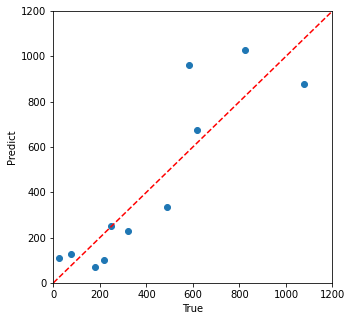

In [96]:
# y_pred = pipe.predict(X_test)
y_pred = gscv.predict(X_test.values)
# y_pred = search.predict(X_test.values)

print(f'RMSE: {mean_squared_error(y_test, y_pred)**(1/2)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'EVS: {explained_variance_score(y_test, y_pred)}')

fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', c='red')
plt.xlabel('True')
plt.ylabel('Predict')
plt.xlim([0, 1200])
plt.ylim([0, 1200]);

In [90]:
pd.DataFrame(
    {
        "True": y_test,
        "Predict": y_pred
    }
)

,True,Predict
47,583,711.902944
18,321,237.643363
56,246,213.659418
13,75,45.891008
37,490,507.732221
23,217,157.326167
6,180,161.558253
28,1078,1172.889576
12,2048,1752.127155
33,619,591.293825
